***
***

<b><font size="5">World Happiness Report: How can world leaders improve happiness?</font> </b>
    

Carolina Duque Chopitea <br>
April 16, 2020 <br>
<br>
<br>
    
***
***

<b><font size="4"> Background & Analysis Objective</font> </b>

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors including health, GDP and economy, family, government trust and generosity. In addition, a "Dystopia" variable is included, this is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark to compare the other indicators against. The factors are then look in terms of how much they contribute to making life evaluations higher in each country than they are in Dystopia (a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors) (<a href="https://worldhappiness.report/faq/"> Link </a>)

Data from the Happiness Report 2015, 2016, and 2017 was analyzed in order to understand the 
- (1) the state of world happiness
- (2) gaps in happiness around the world
- (3) what actions can world leaders take to improve happiness in their countries. Therefore, the goal of this analysis was to look at the 6 factors considered to drive happiness and identify what factors influence happiness the most in order to identify policies to increase happiness scores.  


<b><font size="3">Possible questions to answer</font> </b>

- What regions are the happiest? 
- What is the world average? what countries are below average?
- What countries are consistently the happy the happiest? 
- What are the features that contribute the most to happiness? 
- Beside regions, are there any other clusters? based on 'behavior'?
- Any recommendations to increase happiness? 

<b><font size="3">Packages</font> </b>

In [88]:
import pandas as pd                                     # data science essentials
import matplotlib.pyplot as plt                         # data viz fundamentals
import seaborn as sns                                   # enhanced data viz

from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering




# For map visualization
from chart_studio.plotly import plot, iplot

import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()



<b><font size="3">Datasets</font> </b>

In [2]:
data_2015 = pd.read_csv("2015.csv")
data_2016 = pd.read_csv("2016.csv")
data_2017 = pd.read_csv("2017.csv")

<b><font size="3">Feature Explanation</font> </b>

- Country : Name of the country.
- Region : Region the country belongs to.
- Happiness Rank : Rank of the country based on the Happiness Score.
- Happiness Score : A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
- Economy : real GDP per capita
- Family : social support
- Health healthy life expectancy
- Freedom : freedom to make life choices
- Trust : perceptions of corruption
- Generosity : perceptions of generosity
- Dystopia : each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark
- 2015: Standard error, Dystopia residual
- 2016: Upper/Lower confidence intervals, Dystopita residuals
- 2017: Whisker high/low, dystopia residuals

# Exploratory Analysis

In [3]:
# column names

print("2015:", data_2015.columns)
print("2016:", data_2016.columns)
print("2017:", data_2017.columns)

# columns to investigate 

2015: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017: Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In [4]:
# datasets
# SE the smaller the better, 
#tells you accurate the score is, how accurate the mean of any given sample from that population 
#the extent to which distribution represents population

data_2015.head(5)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [5]:
# the average of the intervals is the score. There is 95% chance that the actual
#(according to report https://s3.amazonaws.com/happiness-report/2016/FAQ_2016.pdf)
# True value can fall fall between low/high confidence interval. The score is average of this
data_2016.head(5)


Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [6]:

#whisers are the lowest and smallest scores for the country
data_2017.head(5)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [7]:
# info about variables 

print("2015:", data_2015.info())
print("2016:", data_2016.info())
print("2017:", data_2017.info())

# some countries not reported in some datasets, how to find out which ones?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
# change happines rank to str

data_2015['Happiness.Rank'] = data_2015['Happiness Rank'].astype(str)
data_2016['Happiness.Rank'] = data_2016['Happiness Rank'].astype(str)
data_2017['Happiness.Rank'] = data_2017['Happiness.Rank'].astype(str)

#data_2017 = data_2017.sort_values(by="Happiness.Score", ascending=False)
#data_2017.head(10)

In [9]:
# Descriptive statistics
data_2015.describe().round(3)

Happiness Rank  Happiness Score  Standard Error  \
count         158.000          158.000         158.000   
mean           79.494            5.376           0.048   
std            45.754            1.145           0.017   
min             1.000            2.839           0.018   
25%            40.250            4.526           0.037   
50%            79.500            5.232           0.044   
75%           118.750            6.244           0.052   
max           158.000            7.587           0.137   

       Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
count                   158.000  158.000                   158.000  158.000   
mean                      0.846    0.991                     0.630    0.429   
std                       0.403    0.272                     0.247    0.151   
min                       0.000    0.000                     0.000    0.000   
25%                       0.546    0.857                     0.439    0.328   
50%                       0.910    1.030                     0.697    0.436   
75%                       1.158    1.214                     0.811    0.549   
max                       1.690    1.402                     1.025    0.670   

       Trust (Government Corruption)  Generosity  Dystopia Residual  
count                        158.000     158.000            158.000  
mean                           0.143       0.237              2.099  
std                            0.120       0.127              0.554  
min                            0.000       0.000              0.329  
25%                            0.062       0.151              1.759  
50%                            0.107       0.216              2.095  
75%                            0.180       0.310              2.462  
max                            0.552       0.796              3.602

In [10]:
data_2016.describe().round(3)

Happiness Rank  Happiness Score  Lower Confidence Interval  \
count         157.000          157.000                    157.000   
mean           78.981            5.382                      5.282   
std            45.466            1.142                      1.148   
min             1.000            2.905                      2.732   
25%            40.000            4.404                      4.327   
50%            79.000            5.314                      5.237   
75%           118.000            6.269                      6.154   
max           157.000            7.526                      7.460   

       Upper Confidence Interval  Economy (GDP per Capita)   Family  \
count                    157.000                   157.000  157.000   
mean                       5.482                     0.954    0.794   
std                        1.136                     0.413    0.267   
min                        3.078                     0.000    0.000   
25%                        4.465                     0.670    0.642   
50%                        5.419                     1.028    0.841   
75%                        6.434                     1.280    1.022   
max                        7.669                     1.824    1.183   

       Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
count                   157.000  157.000                        157.000   
mean                      0.558    0.371                          0.138   
std                       0.229    0.146                          0.111   
min                       0.000    0.000                          0.000   
25%                       0.383    0.257                          0.061   
50%                       0.597    0.397                          0.105   
75%                       0.730    0.485                          0.176   
max                       0.953    0.608                          0.505   

       Generosity  Dystopia Residual  
count     157.000            157.000  
mean        0.243              2.326  
std         0.134              0.542  
min         0.000              0.818  
25%         0.155              2.032  
50%         0.222              2.291  
75%         0.312              2.665  
max         0.820              3.838

In [11]:
data_2017.describe().round(3)

Happiness.Score  Whisker.high  Whisker.low  Economy..GDP.per.Capita.  \
count          155.000       155.000      155.000                   155.000   
mean             5.354         5.452        5.256                     0.985   
std              1.131         1.119        1.145                     0.421   
min              2.693         2.865        2.521                     0.000   
25%              4.506         4.608        4.375                     0.663   
50%              5.279         5.370        5.193                     1.065   
75%              6.102         6.195        6.007                     1.318   
max              7.537         7.622        7.480                     1.871   

        Family  Health..Life.Expectancy.  Freedom  Generosity  \
count  155.000                   155.000  155.000     155.000   
mean     1.189                     0.551    0.409       0.247   
std      0.287                     0.237    0.150       0.135   
min      0.000                     0.000    0.000       0.000   
25%      1.043                     0.370    0.304       0.154   
50%      1.254                     0.606    0.437       0.232   
75%      1.414                     0.723    0.517       0.324   
max      1.611                     0.949    0.658       0.838   

       Trust..Government.Corruption.  Dystopia.Residual  
count                        155.000            155.000  
mean                           0.123              1.850  
std                            0.102              0.500  
min                            0.000              0.378  
25%                            0.057              1.591  
50%                            0.090              1.833  
75%                            0.153              2.145  
max                            0.464              3.117

In [12]:
# Are there missing values?
print("Missin values 2015:", data_2015.isnull().any().any())
print("Missin values 2016:", data_2016.isnull().any().any())
print("Missin values 2017:", data_2017.isnull().any().any())

Missin values 2015: False
Missin values 2016: False
Missin values 2017: False


### Feature Engineering: creating region for 2017 dataset

In [13]:
# Joining dataset to create region for 2017
# creating a copy of my data set

data_2017_all = data_2017.copy()


In [14]:
# obtaining variables of interest to join from 2015 dataset
region_country = data_2015[["Country", "Region"]]

# Outer join of dataset 
data_2017_all_new = pd.merge(region_country, data_2017_all, how='outer')


# Checking for missing values
# you can observe that 9 values "snicked" into the dataset since they trigger
# missing values on other columns, also note that there are 6 regions that have missing values

data_2017_all_new.isnull().sum()

# I filled in those regions with N/A and perhaps later will fill by hand,
# and got rid of values that got added into dataset

data_2017_all_new["Region"] = data_2017_all_new["Region"].fillna("N/A")
data_2017_all_new.isnull().sum()

data_2017 =  data_2017_all_new.dropna().sort_values(by = ['Happiness.Rank'])

data_2017 = data_2017.reset_index(drop=True)
#Cheking for missing values
data_2017.isnull().any().any()

#exporting to excel 
data_2017.to_excel("2017_RegionsAdded.xlsx", index= False)

#data_2017

In [15]:
#checking data set again 2017
data_2017.info()
#data_2017.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Region                         155 non-null    object 
 2   Happiness.Rank                 155 non-null    object 
 3   Happiness.Score                155 non-null    float64
 4   Whisker.high                   155 non-null    float64
 5   Whisker.low                    155 non-null    float64
 6   Economy..GDP.per.Capita.       155 non-null    float64
 7   Family                         155 non-null    float64
 8   Health..Life.Expectancy.       155 non-null    float64
 9   Freedom                        155 non-null    float64
 10  Generosity                     155 non-null    float64
 11  Trust..Government.Corruption.  155 non-null    float64
 12  Dystopia.Residual              155 non-null    flo

In [16]:
#print("2015:", data_2015['Region'].value_counts(), sep="\n")
#print("2016:", data_2016['Region'].value_counts(), sep="\n")
print("2017:", data_2017['Region'].value_counts(), sep="\n")

2017:
Sub-Saharan Africa                 36
Central and Eastern Europe         29
Latin America and Caribbean        21
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
N/A                                 6
Eastern Asia                        4
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


In [17]:
#what contries have region missing?

for index , val in data_2017.iterrows():
    if data_2017.loc[index, 'Region'] == 'N/A':
        print(val)

Country                            Namibia
Region                                 N/A
Happiness.Rank                         111
Happiness.Score                      4.574
Whisker.high                       4.77035
Whisker.low                        4.37765
Economy..GDP.per.Capita.          0.964434
Family                             1.09847
Health..Life.Expectancy.          0.338612
Freedom                           0.520304
Generosity                       0.0771337
Trust..Government.Corruption.     0.093147
Dystopia.Residual                  1.48189
Name: 14, dtype: object
Country                          South Sudan
Region                                   N/A
Happiness.Rank                           147
Happiness.Score                        3.591
Whisker.high                         3.72554
Whisker.low                          3.45646
Economy..GDP.per.Capita.            0.397249
Family                              0.601323
Health..Life.Expectancy.            0.163486
Freedom     

In [18]:
# filling region manualy 

#Belize
data_2017.loc[data_2017["Country"] == "Belize", "Region"] =  "Latin America and Caribbean"

#cheking
data_2017.loc[49 , [ "Country","Region", "Happiness.Score"]]

Country                         Benin
Region             Sub-Saharan Africa
Happiness.Score                 3.657
Name: 49, dtype: object

In [19]:
# Changing Taiwan
data_2017.loc[data_2017["Country"] == "Taiwan Province of China", "Region"] =  "Eastern Asia"

#cheking
data_2017.loc[32 , [ "Country","Region", "Happiness.Score"]]

Country                   Ivory Coast
Region             Sub-Saharan Africa
Happiness.Score                  4.18
Name: 32, dtype: object

In [20]:
# Changing HongKong
data_2017.loc[data_2017["Country"] == "Hong Kong S.A.R., China", "Region"] =  "Eastern Asia"

#cheking
data_2017.loc[70 , [ "Country","Region", "Happiness.Score"]]

Country                                 Brazil
Region             Latin America and Caribbean
Happiness.Score                          6.635
Name: 70, dtype: object

In [21]:
# Changing Somalia
data_2017.loc[data_2017["Country"] == "Somalia", "Region"] =  "Sub-Saharan Africa"

#cheking
data_2017.loc[92 , [ "Country","Region", "Happiness.Score"]]

Country                     Malaysia
Region             Southeastern Asia
Happiness.Score                6.084
Name: 92, dtype: object

In [22]:
# Changing Namibia
data_2017.loc[data_2017["Country"] == "Namibia", "Region"] =  "Sub-Saharan Africa"

#cheking
data_2017.loc[110 , [ "Country","Region", "Happiness.Score"]]

Country                          Turkmenistan
Region             Central and Eastern Europe
Happiness.Score                         5.822
Name: 110, dtype: object

In [23]:
# Changing South Sudan
data_2017.loc[data_2017["Country"] == "South Sudan", "Region"] = "Sub-Saharan Africa"

#cheking
data_2017.loc[146 , [ "Country","Region", "Happiness.Score"]]

Country                               Honduras
Region             Latin America and Caribbean
Happiness.Score                          5.181
Name: 146, dtype: object

In [24]:
# Cheking if values replaced

print("2017:", data_2017['Region'].value_counts(), sep="\n")


#for index , val in data_2017.iterrows():
 #   if data_2017.loc[index, 'Region'] == 'N/A':
     #   print(val)
  #  else: print("All values have been replaced")  



# all countries have a region now
# saving and checkpoint
data_2017.to_excel("2017_RegionsAdded.xlsx", index= False)

data_2017.isnull().sum().sum()


2017:
Sub-Saharan Africa                 39
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


0

# Looking at Happiness by Region

In [25]:
# re-calling file
data_2017 = pd.read_excel("2017_RegionsAdded.xlsx")
data_2015 = pd.read_csv("2015.csv")
data_2016 = pd.read_csv("2016.csv")


In [26]:
# 2015 Region 

data_2015.rename(columns = {'Happiness Score':'Happiness_Score'}, inplace = True)



In [27]:
# getting average score per region 

# 2015 region
region_lists=list(data_2015['Region'].unique())

region_happiness_avg=[]

for val in region_lists:
    region=data_2015[data_2015['Region']==val]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_avg.append(region_happiness_rate)
    
region_2015 =pd.DataFrame({'Region':region_lists,'2015_Happiness_Avg':region_happiness_avg})

region_2015 = region_2015.sort_values(by = ['2015_Happiness_Avg'], ascending = False).round(2)
region_2015= region_2015.reset_index(drop=True)

print(region_2015)



                            Region  2015_Happiness_Avg
0        Australia and New Zealand                7.28
1                    North America                7.27
2                   Western Europe                6.69
3      Latin America and Caribbean                6.14
4                     Eastern Asia                5.63
5  Middle East and Northern Africa                5.41
6       Central and Eastern Europe                5.33
7                Southeastern Asia                5.32
8                    Southern Asia                4.58
9               Sub-Saharan Africa                4.20


In [28]:
data_2016.rename(columns = {'Happiness Score':'Happiness_Score'}, inplace = True)

In [29]:
#Regional scores

region_lists=list(data_2016['Region'].unique())

region_happiness_avg=[]

for val in region_lists:
    region=data_2016[data_2016['Region']==val]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_avg.append(region_happiness_rate)
    
region_2016 =pd.DataFrame({'Region':region_lists,'2016_Happiness_Avg':region_happiness_avg})

region_2016 = region_2016.sort_values(by = ['2016_Happiness_Avg'], ascending = False).round(2)
region_2016= region_2016.reset_index(drop=True)

print(region_2016)

                            Region  2016_Happiness_Avg
0        Australia and New Zealand                7.32
1                    North America                7.25
2                   Western Europe                6.69
3      Latin America and Caribbean                6.10
4                     Eastern Asia                5.62
5  Middle East and Northern Africa                5.39
6       Central and Eastern Europe                5.37
7                Southeastern Asia                5.34
8                    Southern Asia                4.56
9               Sub-Saharan Africa                4.14


In [30]:
data_2017.rename(columns = {'Happiness.Score':'Happiness_Score'}, inplace = True)

In [31]:
#regional scores
region_lists=list(data_2017['Region'].unique())

region_happiness_avg=[]

for val in region_lists:
    region=data_2017[data_2017['Region']==val]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_avg.append(region_happiness_rate)
    
region_2017 =pd.DataFrame({'Region':region_lists,'2017_Happiness_Avg':region_happiness_avg})

region_2017 = region_2017.sort_values(by = ['2017_Happiness_Avg'], ascending = False).round(2)
region_2017= region_2017.reset_index(drop=True)

print(region_2017)

                            Region  2017_Happiness_Avg
0        Australia and New Zealand                7.30
1                    North America                7.15
2                   Western Europe                6.70
3      Latin America and Caribbean                5.96
4                     Eastern Asia                5.65
5                Southeastern Asia                5.44
6       Central and Eastern Europe                5.41
7  Middle East and Northern Africa                5.37
8                    Southern Asia                4.63
9               Sub-Saharan Africa                4.11


In [32]:
#world average by region

#Outer join of dataset 
full_regions_scores = pd.merge(region_2015,region_2016, how='outer')
full_regions_scores =  pd.merge(full_regions_scores,region_2017, how='outer')

full_regions_scores = pd.DataFrame(full_regions_scores)
#full_regions_scores 

In [33]:
#mean score per region, 

full_regions_scores ['Total_Avg'] = full_regions_scores [['2015_Happiness_Avg', '2016_Happiness_Avg', '2017_Happiness_Avg']].mean(axis=1).round(1)

#print(" - Average World Happiness 2015-2017:", full_regions_scores['Total_Avg'].mean())

#exporting to excel
full_regions_scores.to_excel("regions_scores.xlsx")

full_regions_scores

Region  2015_Happiness_Avg  2016_Happiness_Avg  \
0        Australia and New Zealand                7.28                7.32   
1                    North America                7.27                7.25   
2                   Western Europe                6.69                6.69   
3      Latin America and Caribbean                6.14                6.10   
4                     Eastern Asia                5.63                5.62   
5  Middle East and Northern Africa                5.41                5.39   
6       Central and Eastern Europe                5.33                5.37   
7                Southeastern Asia                5.32                5.34   
8                    Southern Asia                4.58                4.56   
9               Sub-Saharan Africa                4.20                4.14   

   2017_Happiness_Avg  Total_Avg  
0                7.30        7.3  
1                7.15        7.2  
2                6.70        6.7  
3                5.96        6.1  
4                5.65        5.6  
5                5.37        5.4  
6                5.41        5.4  
7                5.44        5.4  
8                4.63        4.6  
9                4.11        4.1

- Even though Northern European countries always at the top, their regional score falls due to other countries in the world that perform poorly, like many of the Southern European countries, like Greece, Italy and Spain.

- 3 regions out of 10 below average

In [34]:
# Please note that for the averge score per region was looked at it again in the next section
# it was computed using all the contries and as such the values differ slightly.

In [35]:
print(f'The difference between the max region (AUS and NZ) the min region (Sub-Saharan africa) is {round(7.30-4.15, 2)} ')
#full_regions_scores.describe()

The difference between the max region (AUS and NZ) the min region (Sub-Saharan africa) is 3.15 


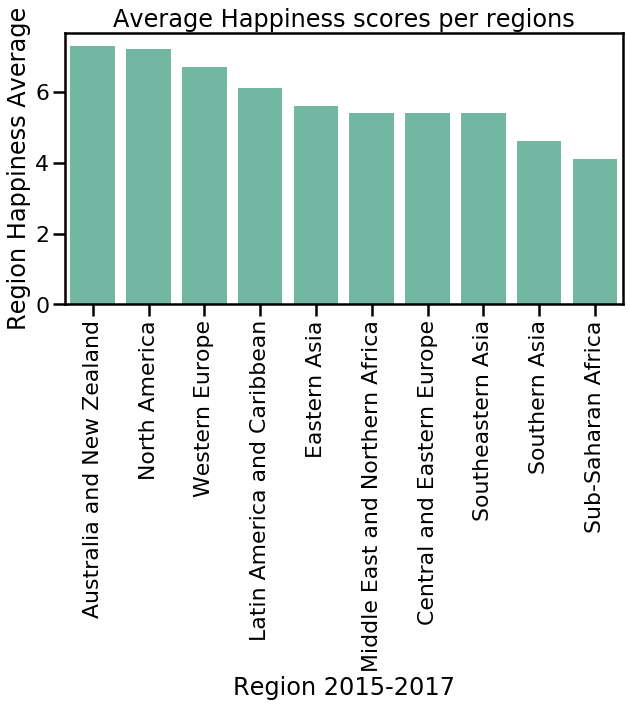

In [36]:
#What are the happiest regions of the world 2015-2017 aggregation?

plt.figure(figsize=(10,5))
sns.barplot(x=full_regions_scores["Region"], y=full_regions_scores['Total_Avg'] ,palette= sns.color_palette("BuGn_r", n_colors=1))
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Region 2015-2017')

plt.ylabel('Region Happiness Average')
plt.title('Average Happiness scores per regions')
plt.show()

- The happiness gaps: here is a big disparity between happiness in the first 3 regions compared to the rest. 
    This countries are also the most developed. 

# Happiness by Country 


In [37]:
#coping our data sets

data_2015 = data_2015.copy()
data_2016 = data_2016.copy()
data_2017 =  data_2017.copy()

In [38]:
# Average world happiness 2015

print(" - Average World Happiness 2015:", round(data_2015['Happiness_Score'].mean(), 2))
print(" - Average World Happiness 2016:", round(data_2016['Happiness_Score'].mean(), 2))
print(" - Average World Happiness 2017:", round(data_2017['Happiness_Score'].mean(), 2))

print(f"World Average Happiness has decreased by {round(5.38 -5.35, 2)} points")

 - Average World Happiness 2015: 5.38
 - Average World Happiness 2016: 5.38
 - Average World Happiness 2017: 5.35
World Average Happiness has decreased by 0.03 points


In [39]:
# mean scores for year

#creating data set 

scores_2015 = data_2015[["Country", "Region", "Happiness_Score"]]
scores_2015.rename(columns = {'Happiness_Score':'2015_Happiness_Score'}, inplace = True)

scores_2016 = data_2016[["Country", "Region", "Happiness_Score"]]
scores_2016.rename(columns = {'Happiness_Score':'2016_Happiness_Score'}, inplace = True)

scores_2017 = data_2017[["Country", "Region", "Happiness_Score"]]
scores_2017.rename(columns = {'Happiness_Score':'2017_Happiness_Score'}, inplace = True)
scores_2017

# Outer join of dataset 
scores_df = pd.merge(scores_2015,scores_2016, how='outer')
scores_df=  pd.merge(scores_df, scores_2017, how='outer')

scores_df = pd.DataFrame(scores_df)
scores_df

# adding country averages

scores_df['Country_Avg'] = scores_df[['2015_Happiness_Score', '2016_Happiness_Score', '2017_Happiness_Score']].mean(axis=1)

scores_df.sort_values(by = 'Country_Avg', ascending= False)

#saving to excel

scores_df.to_excel('Country_Scores.xlsx', index=False)

C:\Users\Carolina Duque\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
#calling excel
scores_df = pd.read_excel('Country_Scores.xlsx')
scores_df

Country              Region  2015_Happiness_Score  \
0                 Switzerland      Western Europe                 7.587   
1                     Iceland      Western Europe                 7.561   
2                     Denmark      Western Europe                 7.527   
3                      Norway      Western Europe                 7.522   
4                      Canada       North America                 7.427   
..                        ...                 ...                   ...   
161         Somaliland Region  Sub-Saharan Africa                   NaN   
162                   Namibia  Sub-Saharan Africa                   NaN   
163               South Sudan  Sub-Saharan Africa                   NaN   
164  Taiwan Province of China        Eastern Asia                   NaN   
165   Hong Kong S.A.R., China        Eastern Asia                   NaN   

     2016_Happiness_Score  2017_Happiness_Score  Country_Avg  
0                   7.509                 7.494     7.530000  
1                   7.501                 7.504     7.522000  
2                   7.526                 7.522     7.525000  
3                   7.498                 7.537     7.519000  
4                   7.404                 7.316     7.382333  
..                    ...                   ...          ...  
161                 5.057                   NaN     5.057000  
162                 4.574                 4.574     4.574000  
163                 3.832                 3.591     3.711500  
164                   NaN                 6.422     6.422000  
165                   NaN                 5.472     5.472000  

[166 rows x 6 columns]

In [41]:


for index , val in scores_df.iterrows():
    if str(scores_df.loc[index, '2015_Happiness_Score']).lower() == 'nan' or\
       str(scores_df.loc[index, '2016_Happiness_Score']).lower() == 'nan' or\
       str(scores_df.loc[index, '2017_Happiness_Score']).lower() == 'nan':
        print(val)

scores_df.isnull().sum()


Country                                            Oman
Region                  Middle East and Northern Africa
2015_Happiness_Score                              6.853
2016_Happiness_Score                                NaN
2017_Happiness_Score                                NaN
Country_Avg                                       6.853
Name: 21, dtype: object
Country                       Taiwan
Region                  Eastern Asia
2015_Happiness_Score           6.298
2016_Happiness_Score           6.379
2017_Happiness_Score             NaN
Country_Avg                   6.3385
Name: 37, dtype: object
Country                                    Suriname
Region                  Latin America and Caribbean
2015_Happiness_Score                          6.269
2016_Happiness_Score                          6.269
2017_Happiness_Score                            NaN
Country_Avg                                   6.269
Name: 39, dtype: object
Country                    Hong Kong
Region               

Country                  0
Region                   0
2015_Happiness_Score     8
2016_Happiness_Score     9
2017_Happiness_Score    11
Country_Avg              0
dtype: int64

In [42]:
# filling missing values with contry mean


m = scores_df.mean(axis=1)
for i, col in enumerate(scores_df):
    scores_df.iloc[:, i] = scores_df.iloc[:, i].fillna(m)
    
scores_df.to_excel('Country_Scores.xlsx', index=False)

scores_df.isnull().sum().sum()


scores_df

Country              Region  2015_Happiness_Score  \
0                 Switzerland      Western Europe                7.5870   
1                     Iceland      Western Europe                7.5610   
2                     Denmark      Western Europe                7.5270   
3                      Norway      Western Europe                7.5220   
4                      Canada       North America                7.4270   
..                        ...                 ...                   ...   
161         Somaliland Region  Sub-Saharan Africa                5.0570   
162                   Namibia  Sub-Saharan Africa                4.5740   
163               South Sudan  Sub-Saharan Africa                3.7115   
164  Taiwan Province of China        Eastern Asia                6.4220   
165   Hong Kong S.A.R., China        Eastern Asia                5.4720   

     2016_Happiness_Score  2017_Happiness_Score  Country_Avg  
0                   7.509                 7.494     7.530000  
1                   7.501                 7.504     7.522000  
2                   7.526                 7.522     7.525000  
3                   7.498                 7.537     7.519000  
4                   7.404                 7.316     7.382333  
..                    ...                   ...          ...  
161                 5.057                 5.057     5.057000  
162                 4.574                 4.574     4.574000  
163                 3.832                 3.591     3.711500  
164                 6.422                 6.422     6.422000  
165                 5.472                 5.472     5.472000  

[166 rows x 6 columns]

In [43]:
#adding ranks to scores

scores_df['Total_Happiness_Rank'] = scores_df['Country_Avg'].rank(ascending=False)

- On average Switzerland is the happiest countries even though their score has decease two years in a row. Followed by Iceland whose score has also slightly decrease, Denmark as well, Norway which presented a small drop in 2016 but back up in 2017  and Canada whose score is also decreasing 

In [44]:
# world average 

print("World Average is:", round(scores_df['Country_Avg'].mean(),2))

scores_df["Region"].value_counts()

World Average is: 5.37


Sub-Saharan Africa                 44
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Eastern Asia                        8
Southern Asia                       7
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [45]:
# Getting Regional Scores

# Austraria and NZ
aus_mean = scores_df[scores_df["Region"] == 'Australia and New Zealand']  
print("Australia and New Zeland mean:", round(aus_mean["Country_Avg"].mean(),1))

# Sub-Saharan Africa
suba_mean =  scores_df[scores_df["Region"] == 'Sub-Saharan Africa'] 
print("Sub-S Africa mean:", round(suba_mean["Country_Avg"].mean(),2))


# Latin America and the Caribbean
la_mean = scores_df[scores_df["Region"] == 'Latin America and Caribbean']  
print("Latin America and Car mean:", round(la_mean["Country_Avg"].mean(),1))

# North America
na_mean = scores_df[scores_df["Region"] == 'North America']  
print("North America mean:", round(na_mean["Country_Avg"].mean(),1))

# Western Europe
we_mean = scores_df[scores_df["Region"] == 'Western Europe']  
print("Western Europe mean:", round(we_mean["Country_Avg"].mean(),1))

# Central and Eastern Europe

ce_mean= scores_df[scores_df["Region"] == 'Central and Eastern Europe']  
print("Central and Eastern Europe mean:", round(ce_mean["Country_Avg"].mean(),1))

# Middle East and NA

me_mean = scores_df[scores_df["Region"] == 'Middle East and Northern Africa']  
print("MENA mean:" , round(me_mean["Country_Avg"].mean(),2))

# Southerneast Asia

seasta_mean = scores_df[scores_df["Region"] == 'Southeastern Asia']  
print("Southeast Asia mean:", round(seasta_mean["Country_Avg"].mean(),1))

# Souther Asia
southa_mean = scores_df[scores_df["Region"] == 'Southern Asia']  
print("Southern Asia mena:", round(southa_mean["Country_Avg"].mean(),1))

# Eastern Asia

ea_mean = scores_df[scores_df["Region"] == 'Eastern Asia']  
print("Eastern Asia mean:",round(ea_mean["Country_Avg"].mean(),1))

# comparing lowest vs hgihest 

print( "max min means:", round((aus_mean["Country_Avg"].mean())-(suba_mean["Country_Avg"].mean()),2))
 

Australia and New Zeland mean: 7.3
Sub-S Africa mean: 4.2
Latin America and Car mean: 6.1
North America mean: 7.2
Western Europe mean: 6.7
Central and Eastern Europe mean: 5.4
MENA mean: 5.44
Southeast Asia mean: 5.3
Southern Asia mena: 4.6
Eastern Asia mean: 5.7
max min means: 3.1


In [46]:

#diference between min and max scores
print(f' the difference between the max (Switzerland) and min (Burundi) scores is {round(7.53-2.9,2)}')
scores_df.describe()
scores_df = scores_df.sort_values(by='Total_Happiness_Rank')

scores_df = scores_df.reset_index(drop=True)

scores_df.to_excel('Country_Scores.xlsx', index=False)

scores_df.head(6)

 the difference between the max (Switzerland) and min (Burundi) scores is 4.63


Country          Region  2015_Happiness_Score  2016_Happiness_Score  \
0  Switzerland  Western Europe                 7.587                 7.509   
1      Denmark  Western Europe                 7.527                 7.526   
2      Iceland  Western Europe                 7.561                 7.501   
3       Norway  Western Europe                 7.522                 7.498   
4      Finland  Western Europe                 7.406                 7.413   
5       Canada   North America                 7.427                 7.404   

   2017_Happiness_Score  Country_Avg  Total_Happiness_Rank  
0                 7.494     7.530000                   1.0  
1                 7.522     7.525000                   2.0  
2                 7.504     7.522000                   3.0  
3                 7.537     7.519000                   4.0  
4                 7.469     7.429333                   5.0  
5                 7.316     7.382333                   6.0

In [47]:
scores_top_10 = scores_df[scores_df['Total_Happiness_Rank'] <= 10]


scores_bottom_10 = scores_df[scores_df['Total_Happiness_Rank'] >= 157]
print('Average score of top 10 countries:' , scores_top_10["Country_Avg"].mean())
print('Average score of bottom 10 countries:' , scores_bottom_10["Country_Avg"].mean())
print('Difference in scores:', round(scores_top_10["Country_Avg"].mean() - scores_bottom_10["Country_Avg"].mean(), 2))

Average score of top 10 countries: 7.419033327738444
Average score of bottom 10 countries: 3.3897499932924893
Difference in scores: 4.03


In [48]:
scores_10 = pd.concat([scores_top_10,
                         scores_bottom_10])
scores_10.to_excel("10_scores.xlsx")

#scores_10

In [49]:
score_df = scores_df.copy()

In [50]:
#- Observe if there are countries that have change increase significantly. 
#Or countries which scores decrease two years in a row, but overall there are no dramatic changes in scores.


# Investigating score changes
scores_df['2015-2016 difference'] = round(scores_df['2015_Happiness_Score'] - scores_df['2016_Happiness_Score'],2)

scores_df['2016-2017 difference'] = round(scores_df['2016_Happiness_Score'] - scores_df['2017_Happiness_Score'],2)

scores_df['2015-2017 difference'] = round(scores_df['2015_Happiness_Score'] - scores_df['2017_Happiness_Score'],2)

scores_df['Percentage Change 2015 to 2017'] = round(((scores_df['2015_Happiness_Score'] - scores_df['2017_Happiness_Score']) / scores_df['2015_Happiness_Score']) * 100, 2 )

#scores_df
#scores_df.describe()

scores_df.to_excel('Country_Scores.xlsx', index=False)

In [51]:
# Checking
#scores_df

- Overall not significant changes in scores across the years. Most changes however can be seen in least develop countries, either as rising stars or decreasing. For example Liberia, Venezuela's and Lesotho's scores have decrease 22.7%, 22.9% and 22.3% respectively, representing the biggest drops.  In turn the biggest spike had been seen in Togo whose score increase 23% between 2015 to 2017.

In [52]:
data = dict(type = 'choropleth', 
            colorscale='Earth',
           locations = scores_df['Country'],
           locationmode = 'country names',
           z = scores_df['Country_Avg'],
           colorbar = {'title':'Happiness Scale'},)
layout = dict(title = 'The Geography Happiness Score', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)

In [53]:
# are there any countries above below world average

#deviding data to better fit plot

part_1 = scores_df.iloc[0:30 , :]

part_2 = scores_df.iloc[30:65 , :]

part_3 = scores_df.iloc[65:105, :]

part_4= scores_df.iloc[105:135 , :]

part_5 = scores_df.iloc[135: , :]


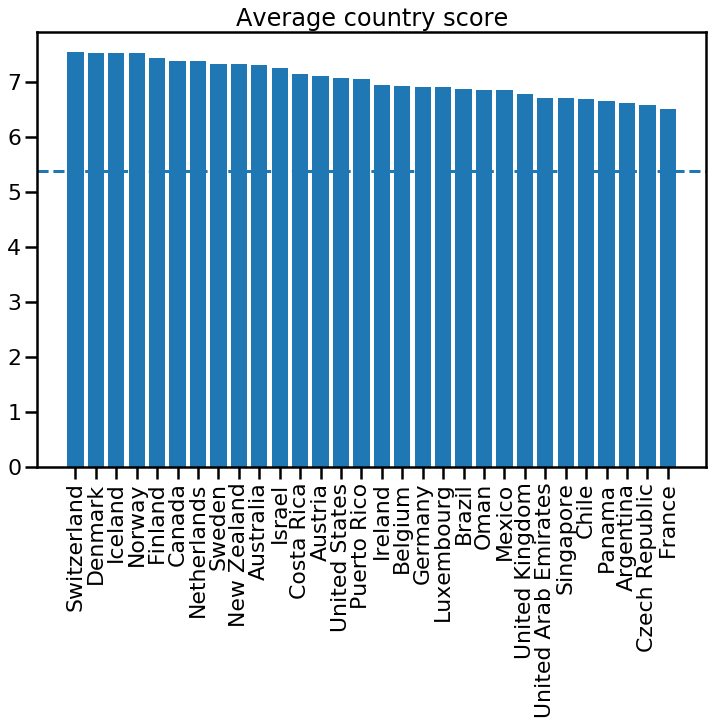

In [54]:
plt.figure(figsize=(12,8))
plt.bar(x=part_1["Country"], height=part_1['Country_Avg'])

plt.xticks(rotation=90)

region_avg= scores_df['Country_Avg'].mean()
plt.axhline(y = region_avg, linestyle = '--')
plt.xticks(ticks=part_1.index, labels=part_1['Country'], rotation=90)
plt.title('Average country score')
plt.show()

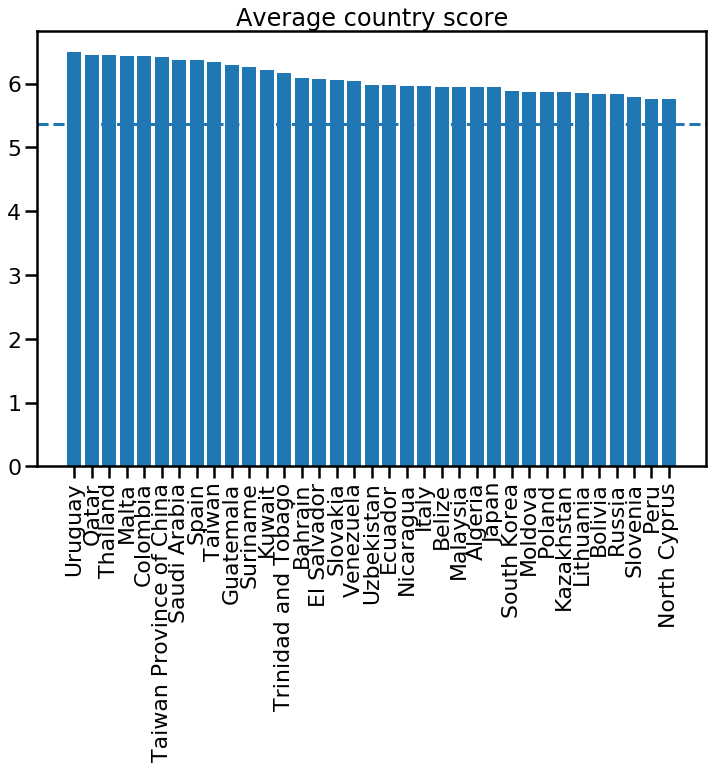

In [55]:
plt.figure(figsize=(12,8))
plt.bar(x=part_2["Country"], height=part_2['Country_Avg'])

plt.xticks(rotation=90)

region_avg= scores_df['Country_Avg'].mean()
plt.axhline(y = region_avg, linestyle = '--')
plt.xticks(ticks=part_2.Country,labels=part_2['Country'], rotation=90)
plt.title('Average country score')
plt.show()

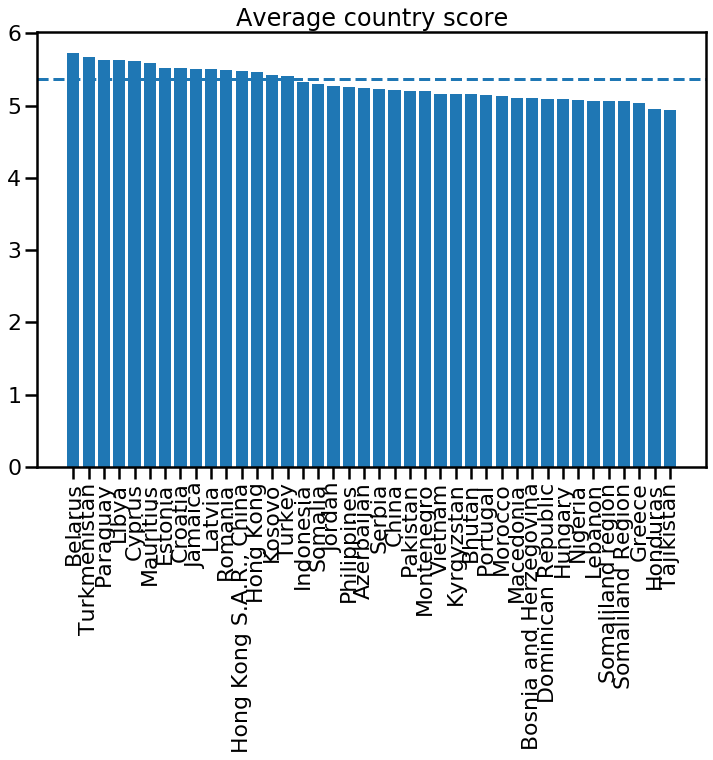

In [56]:
plt.figure(figsize=(12,8))
plt.bar(x=part_3["Country"], height=part_3['Country_Avg'])

plt.xticks(rotation=90)

region_avg= scores_df['Country_Avg'].mean()
plt.axhline(y = region_avg, linestyle = '--')
plt.xticks(ticks=part_3.Country,labels=part_3['Country'], rotation=90)
plt.title('Average country score')
plt.show()

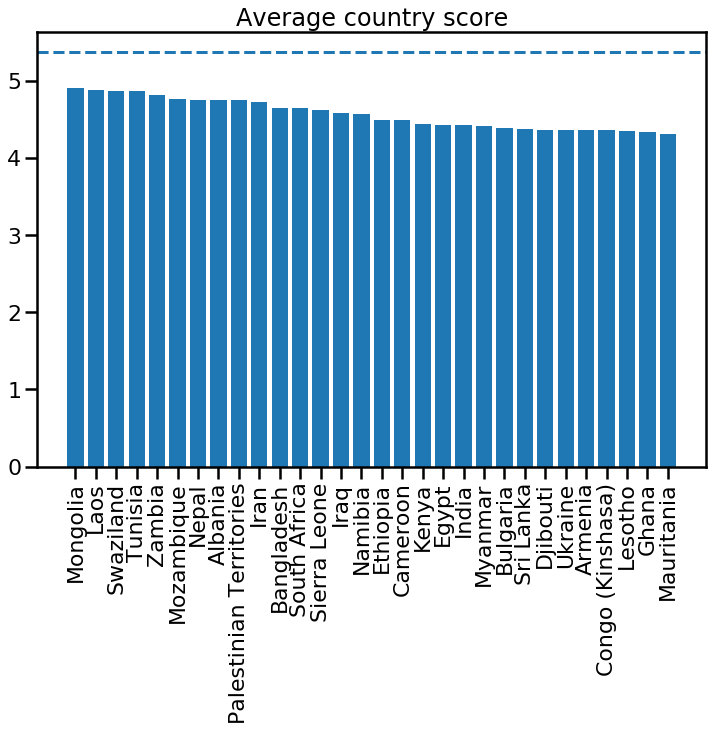

In [57]:
plt.figure(figsize=(12,8))
plt.bar(x=part_4["Country"], height=part_4['Country_Avg'])

plt.xticks(rotation=90)

region_avg= scores_df['Country_Avg'].mean()
plt.axhline(y = region_avg, linestyle = '--')
plt.xticks(ticks=part_4.Country,labels=part_4['Country'], rotation=90)
plt.title('Average country score')
plt.show()

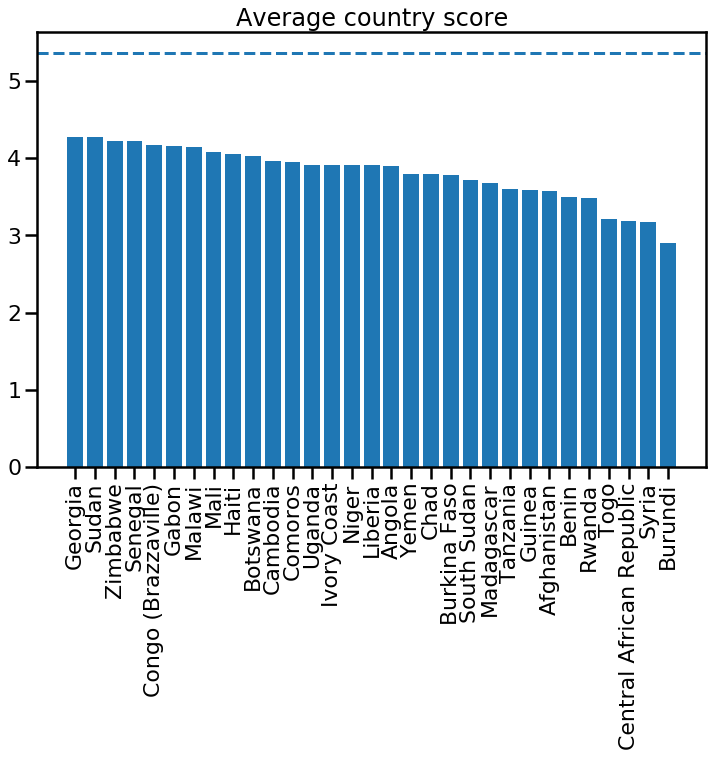

In [58]:
plt.figure(figsize=(12,8))
plt.bar(x=part_5["Country"], height=part_5['Country_Avg'])

plt.xticks(rotation=90)

region_avg= scores_df ['Country_Avg'].mean()
plt.axhline(y = region_avg, linestyle = '--')
plt.xticks(ticks=part_5.Country,labels=part_5['Country'], rotation=90)
plt.title('Average country score')
plt.show()

# Correlation Analysis: What are the most important factors?

In [59]:
# 2015 correlation 
corr_2015 = data_2015.drop(['Happiness Rank'], axis=1)
corr_2015 = corr_2015.corr().round(2)


corr_2015['Happiness_Score'].sort_values(ascending = False)

Happiness_Score                  1.00
Economy (GDP per Capita)         0.78
Family                           0.74
Health (Life Expectancy)         0.72
Freedom                          0.57
Dystopia Residual                0.53
Trust (Government Corruption)    0.40
Generosity                       0.18
Standard Error                  -0.18
Name: Happiness_Score, dtype: float64

- Biggest factors for 2015 score are Economy, Family and Health

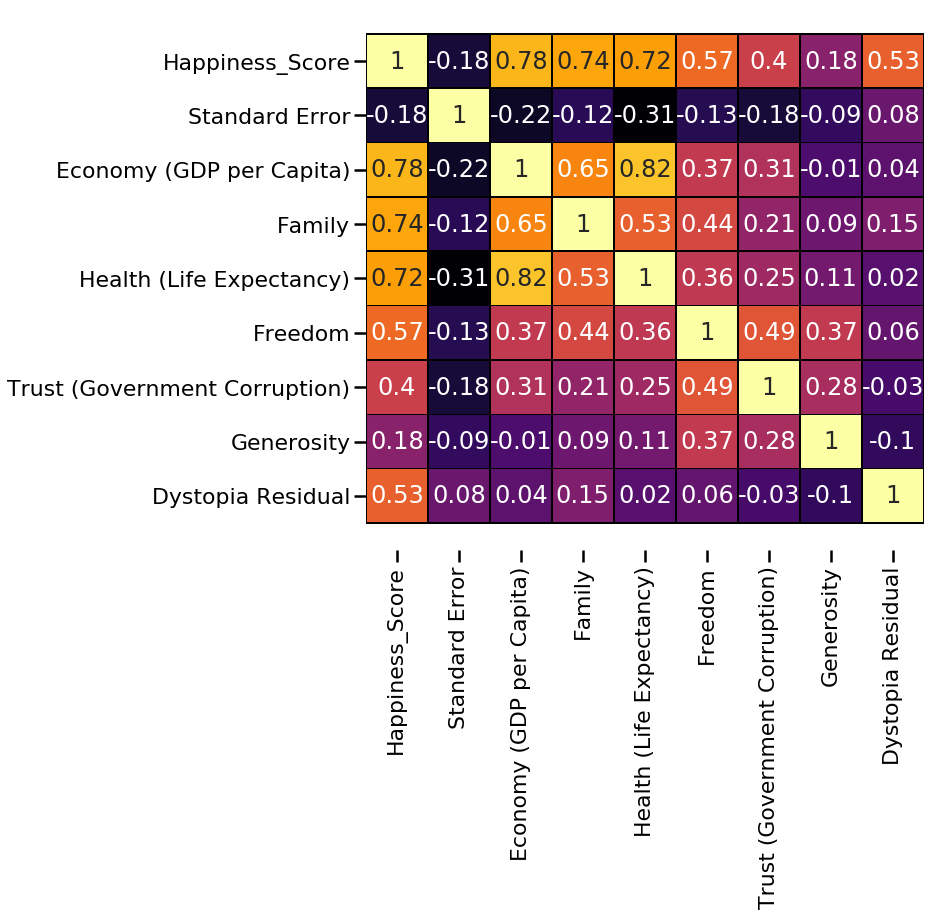

In [60]:

# specifying plot size
fig, ax = plt.subplots(figsize=(10,10))


# creating a heatmap
sns.heatmap(corr_2015,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

plt.show()

In [61]:
# 2016 correlation 
corr_2016 = data_2016.corr().round(2)

corr_2016['Happiness_Score'].sort_values(ascending = False)

Upper Confidence Interval        1.00
Lower Confidence Interval        1.00
Happiness_Score                  1.00
Economy (GDP per Capita)         0.79
Health (Life Expectancy)         0.77
Family                           0.74
Freedom                          0.57
Dystopia Residual                0.54
Trust (Government Corruption)    0.40
Generosity                       0.16
Happiness Rank                  -1.00
Name: Happiness_Score, dtype: float64

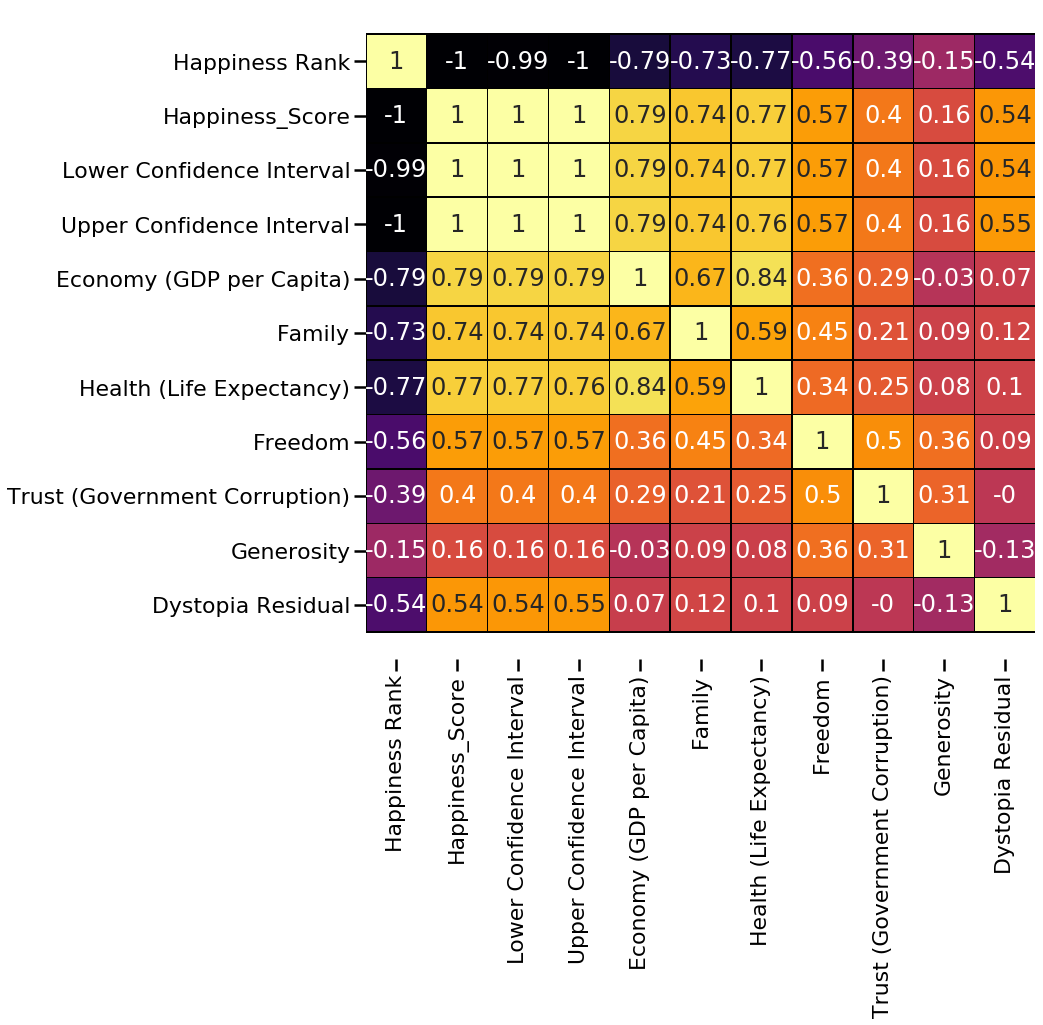

In [62]:

# specifying plot size
fig, ax = plt.subplots(figsize=(12,12))


# creating a heatmap
sns.heatmap(corr_2016,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

plt.show()

- Again, economy, health and family 

In [63]:
# 2017 correlation 
corr_2017 = data_2017.corr().round(2)

corr_2017['Happiness_Score'].sort_values(ascending = False)

Whisker.low                      1.00
Whisker.high                     1.00
Happiness_Score                  1.00
Economy..GDP.per.Capita.         0.81
Health..Life.Expectancy.         0.78
Family                           0.75
Freedom                          0.57
Dystopia.Residual                0.48
Trust..Government.Corruption.    0.43
Generosity                       0.16
Happiness.Rank                  -0.99
Name: Happiness_Score, dtype: float64

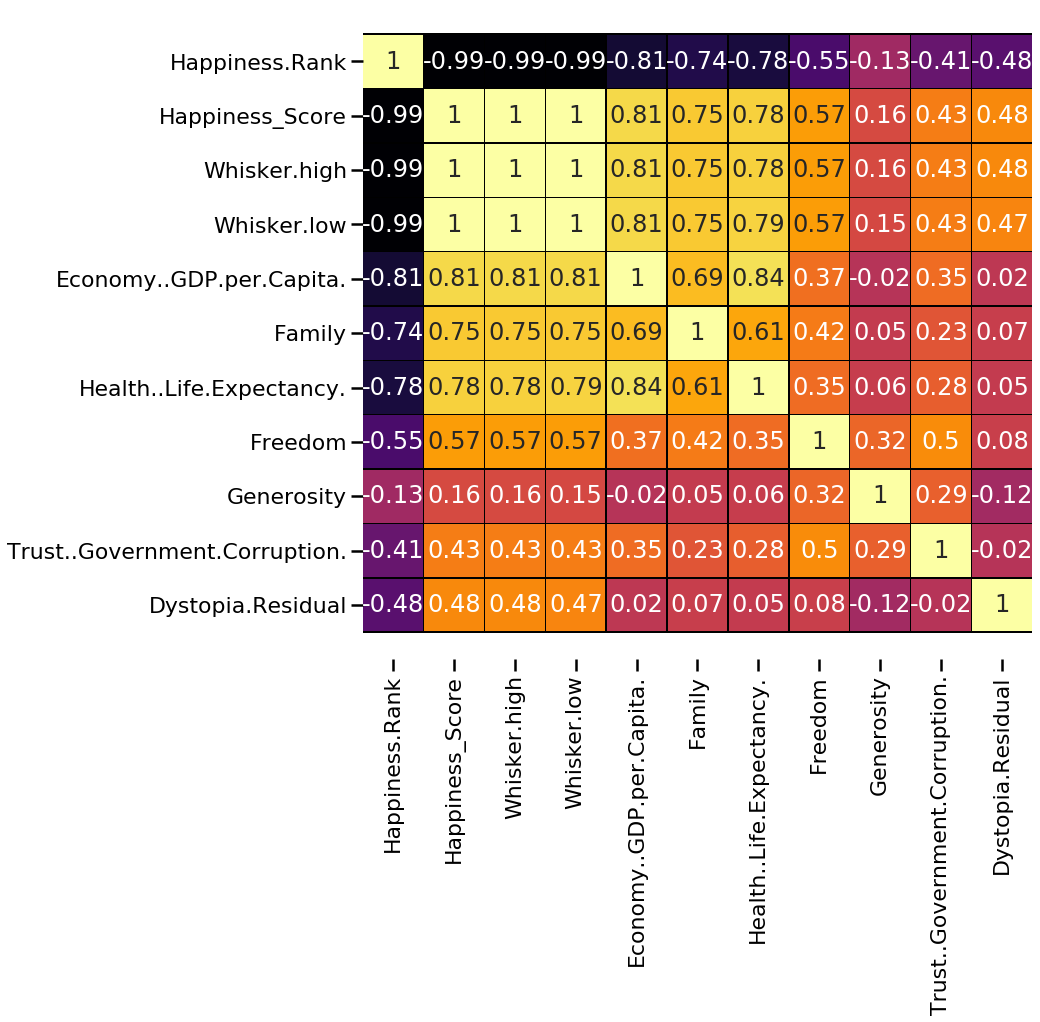

In [64]:

# specifying plot size
fig, ax = plt.subplots(figsize=(12,12))


# creating a heatmap
sns.heatmap(corr_2017,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

plt.show()

- Economy, health and family

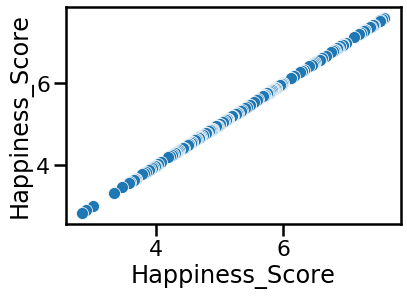

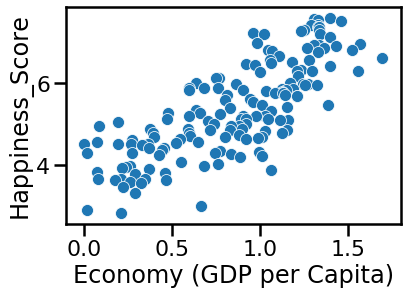

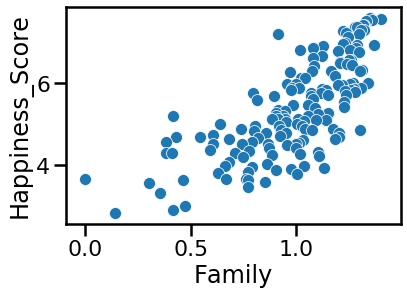

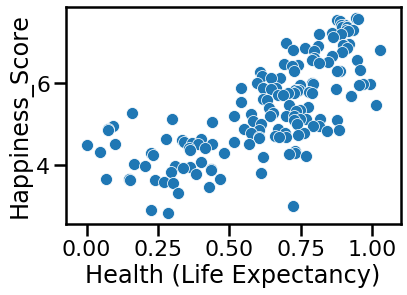

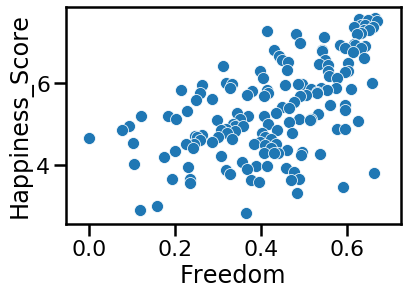

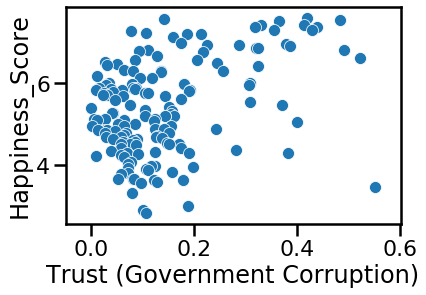

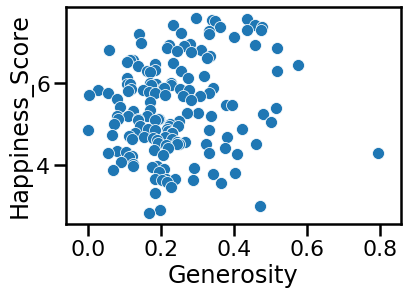

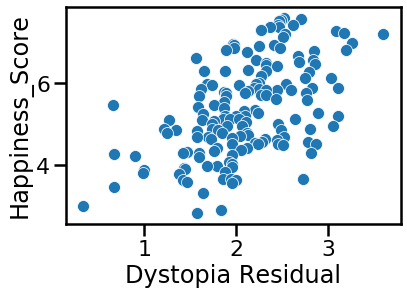

In [65]:
# observe relationship in plot

df_2015= data_2015.drop(['Country',
                        'Happiness Rank',
                        'Region',
                        'Standard Error'], axis=1)

for val in df_2015:
    sns.scatterplot(x=df_2015[val], y=df_2015['Happiness_Score'])
    plt.show();

- Even though other factors like freedom, generosity and trust affect happiness, there is no linear relationship. In contrast for GDP, family and health have a clear impact on happiness. The better of a country is in terms of economy health and family the higher their score for happiness will be. 

There is no need to do a regression model since the score is a sum of this variables! An unit increase in one of the factors will increase score by one unit. 

# Clustering by similarities: an exploration with unsupervised Machine Learning 

Idea is to look at countries based on similarities beyond their happiness score.
For example if you are looking to move somewhere and you wish to go to place that are somehow similar to Switzerland or Finland (yet not necessarily the best country just in terms of happiness), what are your option?

In [66]:
#User define functions


########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (15, 9))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

### K-means Clustering Analysis - Unsupervised Machine Learning

In [67]:
df_2017 = data_2017.drop(['Country', 'Region', 'Happiness.Rank'],
                                      axis = 1)


In [68]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df_2017)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(df_2017)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)

# attaching columns
pca_scaled.columns = df_2017.columns

# checking pre- and post-scaling variance
#print(pd.np.var(data_2017), '\n\n')
#print(pd.np.var(pca_scaled))

In [69]:
# grouping data based on Ward distance
#standard_mergings_ward = linkage(y = pca_scaled,
 #                                method = 'ward')


# setting plot size
#fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
#dendrogram(Z = standard_mergings_ward,
 #          leaf_rotation = 90,
  #         leaf_font_size = 6)


# saving and displaying the plot
#plt.savefig('standard_hierarchical_clust_ward.png')
#plt.show()

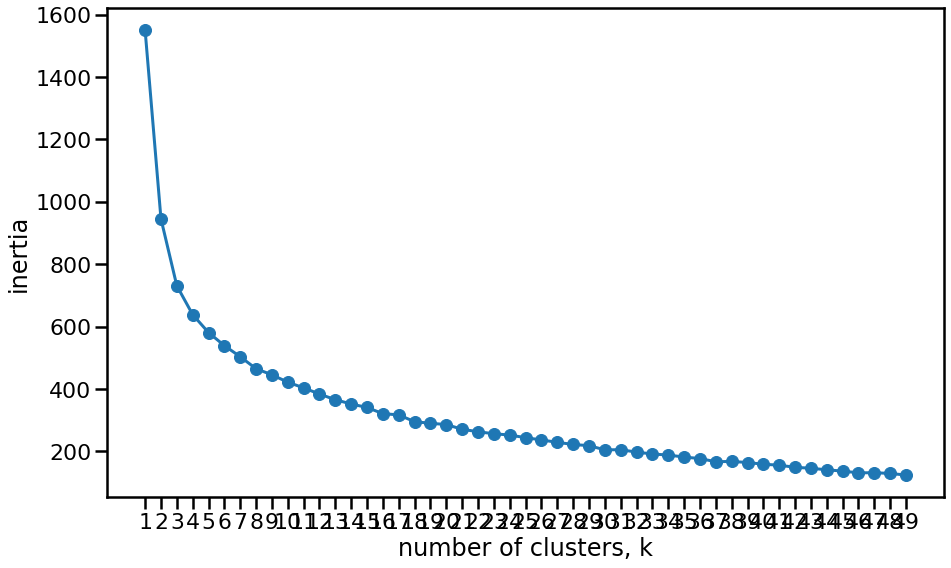

In [70]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [71]:
# INSTANTIATING a k-Means object with five clusters
c_k_pca = KMeans(n_clusters = 5,
                         random_state = 802)


# fitting the object to the data
c_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
c_kmeans_pca = pd.DataFrame({'Cluster': c_k_pca.labels_})


# checking the results
print(c_kmeans_pca.iloc[: , 0].value_counts())

2    46
1    38
0    35
3    25
4    11
Name: Cluster, dtype: int64


In [72]:
# storing cluster centers
centroids_pca = c_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

centroids_pca_df.columns = df_2017.columns

#centroids_pca_df.head(10).round(2)

In [73]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([c_kmeans_pca,
                         df_2017],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([data_2017.loc[ : , ['Country','Region', 'Happiness.Rank']],
                                clst_pca_df],
                                axis = 1)





# checking the results
final_pca_clust_df.head(n = 5)


clusters_2017 = final_pca_clust_df


clusters_2017['Cluster'].value_counts()

2    46
1    38
0    35
3    25
4    11
Name: Cluster, dtype: int64

In [74]:
# renaming regions
cluster_names =  {0 : 1,
                  1 : 2,
                  2 : 3,
                  3 : 4,
                   4 : 5}

clusters_2017['Cluster'].replace(cluster_names, inplace = True)

clusters_2017 = clusters_2017.sort_values(by= "Happiness.Rank", ascending= True)
clusters_2017 = clusters_2017.reset_index(drop=True)

#clusters_2017.isnull().sum()
#clusters_info()

clusters_2017.to_excel('Clusters_2017.xlsx')

In [75]:
#for _ , val in clusters_2017.iterrows():
 #   if clusters_2017.loc[_ , 'Cluster'] == "Cluster 1":
  #      print(val)

clusters_2017["Cluster"].value_counts()

3    46
2    38
1    35
4    25
5    11
Name: Cluster, dtype: int64

In [76]:
clusters_2017.describe()

Happiness.Rank     Cluster  Happiness_Score  Whisker.high  Whisker.low  \
count      155.000000  155.000000       155.000000    155.000000   155.000000   
mean        78.000000    2.606452         5.354019      5.452326     5.255713   
std         44.888751    1.203333         1.131230      1.118542     1.145030   
min          1.000000    1.000000         2.693000      2.864884     2.521116   
25%         39.500000    2.000000         4.505500      4.608172     4.374955   
50%         78.000000    3.000000         5.279000      5.370032     5.193152   
75%        116.500000    3.000000         6.101500      6.194600     6.006527   
max        155.000000    5.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  155.000000  155.000000                     155.000000   
mean     0.408786    0.246883                       0.123120   
std      0.149997    0.134780                       0.101661   
min      0.000000    0.000000                       0.000000   
25%      0.303677    0.154106                       0.057271   
50%      0.437454    0.231538                       0.089848   
75%      0.516561    0.323762                       0.153296   
max      0.658249    0.838075                       0.464308   

       Dystopia.Residual  
count         155.000000  
mean            1.850238  
std             0.500028  
min             0.377914  
25%             1.591291  
50%             1.832910  
75%             2.144654  
max             3.117485

In [77]:
data = dict(type = 'choropleth', 
            colorscale='Redor',
           locations = clusters_2017['Country'],
           locationmode = 'country names',
           z = clusters_2017['Cluster'],
           colorbar = {'title':'Cluster Number'},)
layout = dict(title = 'Clusters', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)



In [78]:
cluster_names = {1 : "Cluster 1",
              2 : "Cluster 2",
                3 : "Cluster 3",
                4 : "Cluster 4",
               5 : "Cluster 5"}

clusters_2017['Cluster'].replace(cluster_names, inplace = True)

clusters_2017 = clusters_2017.sort_values(by= "Happiness.Rank", ascending= True)
clusters_2017 = clusters_2017.reset_index(drop=True)

#clusters_2017.isnull().sum()
#clusters_info()

clusters_2017.to_excel('Clusters_2017.xlsx')

In [79]:
clusters_2017["Cluster"].value_counts()

Cluster 3    46
Cluster 2    38
Cluster 1    35
Cluster 4    25
Cluster 5    11
Name: Cluster, dtype: int64

You probably would like to move to cluster 4: This cluster depicts a good quality of life. Not just happiness but this countries have similarities based on things like family, GDP, health, among others.

# Conclusion: How can world leaders improve happiness?

1. Address happiness inequalities between countries and within regions.
2. Develop policies that particularly focus on improving GDP, Health and Family. 